In [150]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import time

In [64]:
# Load input data
mndata = MNIST('./python-mnist/data')
images, labels = mndata.load_training()
X_all = np.array(images)
Y_all = np.array(labels)

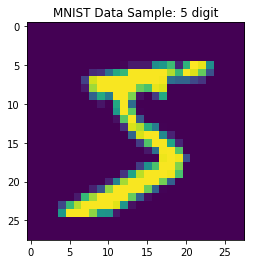

In [28]:
# View sample of data
view = np.array(images[0])
view = np.reshape(view,(28,28))
plt.imshow(view)
plt.title('MNIST Data Sample: %s digit' % labels[0])
plt.show()

In [152]:
# Subset Samples for training, validation
np.random.seed(1)

# Map y-labels to 10-vector
mapping = {}
for i in xrange(10):
    mapping[i] = np.insert(np.zeros(9),i,1)
Y_mapped = np.array([mapping[x] for x in Y_all])
    
# For now, choose first 1000 for training, later it's better to choose a random sample
X_train = X_all[0:1000,:].T
Y_train = Y_mapped[0:1000].T

X_validate = X_all[1001:2000,:].T
Y_validate = Y_mapped[1001:2000].T

In [ ]:
np.random.seed(1)
#Input -> l1 Weight matrix has to be np.shape = (785, 200) extra bias term
w0 = 2*np.random.random((layer_in + 1, layer1)) - 1
# l1 -> l2 Weight matrix has to be np.shape = (201, 100) extra bias term
w1 = 2*np.random.random((layer1 + 1, layer2)) - 1
#l2 -> Output Weight matrix has to be np.shape = (101, 10) extra bias term
w2 = 2*np.random.random((layer2 + 1, layer_out)) - 1

In [163]:
#Architecture & Hyperparameters
#Going to try a small one to start, 2 hidden layers with 200 units and 100 units respectively
layer_in = 784
layer1 = 200
layer2 = 100
layer_out = 10
alpha = 0.5
error_threshold = 0.02


In [160]:
def sigmoid(x, deriv=False):
    if deriv:
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))

In [164]:
#Training
tot_error = 1
counter = 1

tstart = time.time()
while (tot_error > error_threshold):
    # forward prop
    # load in input & label
    x0 = np.hstack((np.ones((X_train.shape[1],1)),X_train.T)).T # matrix shape (785, n(examples))
    y = Y_train # matrix shape (10,n)
    N_examples = x0.shape[1]
    
    # propagate forward 
    x1 = np.hstack((np.ones((N_examples,1)), sigmoid(w0.T.dot(x0)).T)).T # vector length 201
    x2 = np.hstack((np.ones((N_examples,1)), sigmoid(w1.T.dot(x1)).T)).T # vector length 101
    x3 = sigmoid(w2.T.dot(x2)) # vector length 10
    
    # backprop
    # calculate errors
    tot_error = sum(sum((x3 - y)**2 / (2 * N_examples)))
    l3_delta = (x3 - y) # matrix shape (10,n)
    l2_delta = sigmoid(x2[1:], True)*w2[1:,:].dot(l3_delta) # matrix shape (100, n)
    l1_delta = sigmoid(x1[1:], True)*w1[1:,:].dot(l2_delta) # matrix shape (200, n)
    
    # calculate gradients
    l3_grad = l3_delta[np.newaxis, :, :] * x2[:, np.newaxis, :] # matrix shape (101, 10, n)
    l2_grad = l2_delta[np.newaxis, :, :] * x1[:, np.newaxis, :] # matrix shape (201, 100, n)
    l1_grad = l1_delta[np.newaxis, :, :] * x0[:, np.newaxis, :] # matrix shape (785, 200, n)
    
    # find total gradient across all examples
    l3_totgrad = np.average(l3_grad, axis=2) # matrix shape (101,10)
    l2_totgrad = np.average(l2_grad, axis=2) # matrix shape (201,100)
    l1_totgrad = np.average(l1_grad, axis=2) # matrix shape (785,200)
    
    # update weights
    w2 += -alpha*l3_totgrad # update weight 2-> 3
    w1 += -alpha*l2_totgrad # update weight 1->2
    w0 += -alpha*l1_totgrad # update weight 0->1
    
    counter += 1
    if counter % 10 == 0:
        print "Iteration %d, Error: %f" % (counter, tot_error)
        
print "Training to %f error rate took %d seconds." % (error_threshold, time.time()-tstart)

/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Iteration 10, Error: 0.048488
Iteration 20, Error: 0.046985
Iteration 30, Error: 0.045513
Iteration 40, Error: 0.044113
Iteration 50, Error: 0.042761
Iteration 60, Error: 0.041444
Iteration 70, Error: 0.040178
Iteration 80, Error: 0.038954
Iteration 90, Error: 0.037770
Iteration 100, Error: 0.036615
Iteration 110, Error: 0.035508
Iteration 120, Error: 0.034432
Iteration 130, Error: 0.033320
Iteration 140, Error: 0.032214
Iteration 150, Error: 0.031240
Iteration 160, Error: 0.030263
Iteration 170, Error: 0.029349
Iteration 180, Error: 0.028562
Iteration 190, Error: 0.027625
Iteration 200, Error: 0.026788
Iteration 210, Error: 0.025996
Iteration 220, Error: 0.025208
Iteration 230, Error: 0.024435
Iteration 240, Error: 0.023704
Iteration 250, Error: 0.022995
Iteration 260, Error: 0.022311
Iteration 270, Error: 0.021637
Iteration 280, Error: 0.020992
Iteration 290, Error: 0.020322
Training to 0.020000 error rate took 3126 seconds.


In [141]:
# Validation
def validate():
    # forward prop
    # load in input & label
    x0 = np.hstack((np.ones((X_validate.shape[1],1)),X_validate.T)).T # matrix shape (785, n(examples))
    y = Y_validate # matrix shape (10,n)
    N_examples = x0.shape[1]
    
    # propagate forward 
    x1 = np.hstack((np.ones((N_examples,1)), sigmoid(w0.T.dot(x0)).T)).T # vector length 201
    x2 = np.hstack((np.ones((N_examples,1)), sigmoid(w1.T.dot(x1)).T)).T # vector length 101
    x3 = sigmoid(w2.T.dot(x2)) # vector length 10
    
    # backprop
    # calculate errors
    tot_error = sum(sum((x3 - y)**2 / (2 * N_examples)))
    return tot_error
    
def find_labels(x):
    x0 = np.hstack((np.ones((x.shape[0],1)),x)).T # matrix shape (785, n(examples))
    print x0
    N_examples = x0.shape[1]
    
    # propagate forward 
    x1 = np.hstack((np.ones((N_examples,1)), sigmoid(w0.T.dot(x0)).T)).T # vector length 201
    x2 = np.hstack((np.ones((N_examples,1)), sigmoid(w1.T.dot(x1)).T)).T # vector length 101
    x3 = sigmoid(w2.T.dot(x2)) # vector length 10
    
    
    return np.argmax(x3, axis=0)

In [130]:
xtest = X_all[0:2]
x0 = np.hstack((np.ones((xtest.shape[0],1)),xtest)).T # matrix shape (785, n(examples))


In [ ]:
#Load previously computed weights

In [166]:
validate()

/usr/local/Cellar/ipython@5/5.5.0_1/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


0.191942398505874